In [1]:
import pandas as pd

In [2]:
!head -n 10000 violations.csv > small-violations.csv

In [63]:
df = pd.read_csv("small-violations.csv")
df.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

### 1. Make sure "Plate ID" is a string

In [5]:
print("The data type is:", type(df['Plate ID'][0]))

The data type is: <class 'str'>


### 2. Discard the '0's as NaN

In [6]:
df['Vehicle Year'] = df['Vehicle Year'].replace("0","NaN")
df.head(5) #check

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN


### 3. Make dates to be dates.

In [7]:
import datetime
import dateutil

In [8]:
def to_dates(datestring):
    yourdate = dateutil.parser.parse(datestring)
    return yourdate

In [9]:
df['Issue Date'] = df['Issue Date'].apply(to_dates)
#df.head()['Issue Date'].astype(datetime.datetime)

In [10]:
#check types
df.dtypes

Summons Number                                int64
Plate ID                                     object
Registration State                           object
Plate Type                                   object
Issue Date                           datetime64[ns]
Violation Code                                int64
Vehicle Body Type                            object
Vehicle Make                                 object
Issuing Agency                               object
Street Code1                                  int64
Street Code2                                  int64
Street Code3                                  int64
Vehicle Expiration Date                       int64
Violation Location                          float64
Violation Precinct                            int64
Issuer Precinct                               int64
Issuer Code                                   int64
Issuer Command                               object
Issuer Squad                                  int64
Violation Ti

### 4. "Date first observed" : transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.

In [11]:
def date_str(int):
    return str(int)
df['Date First Observed'] = df['Date First Observed'].apply(date_str)

In [12]:
def pydate(strdate):
    if strdate == "0":
        return strdate.replace("0","NaN")

    else:
        yourdate = dateutil.parser.parse(strdate)
        date_py = yourdate.strftime("%Y-%m-%d")
        return date_py

In [13]:
df['Date First Observed'] = df['Date First Observed'].apply(pydate)

### 5. Make "Violation time" a time.

In [14]:
df['Violation Time'].head()

0    0752A
1    1240P
2    1243P
3    0232P
4    1239P
Name: Violation Time, dtype: object

In [15]:
def intostring(n):
    return str(n)

In [16]:
df["Violation Time"]= df['Violation Time'].apply(intostring)

In [17]:
def right_time(time_str):
    try:
        time_ampm = time_str.replace("P"," PM").replace("A"," AM")
        time_format = time_ampm[:2] + ":" + time_ampm[2:]
        new_time = dateutil.parser.parse(time_format)
        return new_time.strftime("%H:%M")
    except:
        return None
right_time(df['Violation Time'][55])

'01:30'

In [18]:
df['Violation Time'] = df['Violation Time'].apply(right_time)

### 6. Replace color

In [19]:
# check the color values
# df['Vehicle Color'].value_counts()

In [20]:
# replace some of them
def to_color(color):
    if color == "GY"or color == "GRAY" or color == "GRY" or color =="GR":
        return "GREY"
    if color == "WH" or color == "WHT" or color == "WT":
        return "WHITE"
    if color == "BK" or color == "BLK" or color == "BL":
        return "BLACK"
    if color == "BL" or color == "BLU":
        return "BLUE"
    if color == "RD":
        return "RED"
    if color == "BR" or color == "BRN" or color == "BRWN":
        return "BROWN"
    if color == "GRN" or color == "GN":
        return "GREEN"
    if color == "SILV" or color ==  "SIL" or color == "SILVR" or color == "SILVE" or color == "SL":
        return "SILVER"
    if color == "TN":
        return "TAN"
    else:
        return color

In [21]:
df['Vehicle Color'] = df['Vehicle Color'].apply(to_color)
#df['Vehicle Color'].value_counts().head(15) #check again

### 7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.

In [22]:
codes = pd.read_csv("DOF_Parking_Violation_Codes.csv")

In [23]:
#codes

In [24]:
# divide "37-38" row into to dataframes 
m37= codes[codes["CODE"]=="37-38"]
m37["CODE"]="37"

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
m38= codes[codes["CODE"]=="37-38"]
m38["CODE"]="38"

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [26]:
# append two dfs
m = m37.append(m38,ignore_index=True)

In [27]:
# drop the code="37-38" row from "codes"
codes = codes.drop(23)

In [28]:
# append "codes" with "m"
new_codes = m.append(codes,ignore_index=True)
#new_codes

In [29]:
def to_str(vcode):
    return str(vcode)
df['Violation Code'] = df['Violation Code'].apply(to_str)
#type(df['Violation Code'][0]) #check type

In [30]:
vio_code = df.merge(codes, left_on='Violation Code', right_on='CODE')

### 8. How much money did NYC make off of parking violations?

In [32]:
# check the value of vio_code['All Other Areas']
vio_code['All Other Areas'].value_counts()

$115                                     3996
$45                                      2414
$65                                      1333
$60                                      1078
$95                                       650
$165                                      138
$180                                       82
vary                                       74
$35                                         9
$200 (Heavy Tow, plus violation fine)       6
Name: All Other Areas, dtype: int64

In [33]:
# make sure that money is int
def money_int(money):
    if money == "$200 (Heavy Tow, plus violation fine)":
        imoney = int(money.replace("$","").replace(" (Heavy Tow, plus violation fine)",""))
        return imoney
    elif money != "vary":
        return int(money.replace("$",""))
    else:
        return int("0")

In [34]:
vio_code['money'] = vio_code['All Other Areas'].apply(money_int)

In [35]:
#sum the number
print("NYC makes", vio_code['money'].sum(),"Dollors on parking violations.")

NYC makes 820290 Dollors on parking violations.


### 9.What's the most lucrative kind of parking violation? The most frequent?

In [36]:
vio_code['DEFINITION'].value_counts().head(3)

Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1894
Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words also known as "double parking". However, a person may stand a Commercial Vehicle alongside a vehicle parked at the curb at such 

In [37]:
vio_code['Violation Code'].value_counts().head(3)

21    1894
46    1366
14     987
Name: Violation Code, dtype: int64

### 10.How much money does NYC make off of all non-New York vehicles?

In [38]:
non_ny = vio_code[vio_code['Registration State']!='NY']['money'].sum()
print("NYC make off", non_ny, "dollors of all non-New York vehicles.")

NYC make off 274940 dollors of all non-New York vehicles.


### 11. Make a chart of the top few.

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

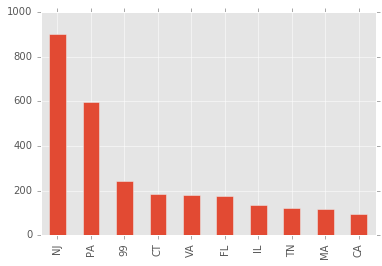

In [40]:
vio_code[vio_code['Registration State']!='NY']['Registration State'].value_counts().head(10).plot(kind='bar')

### 12. What time of day do people usually get their tickets?

In [41]:
def to_time(time):
    try:
        yourtime = dateutil.parser.parse(time)
        hour = yourtime.strftime("%H")
        return hour
    except:
        return None
#print(to_time(vio_code['Violation Time'][10]))

In [42]:
vio_code['Violation Hour'] = vio_code['Violation Time'].apply(to_time)

In [44]:
# nigtht : 0-6
count_nig = 0
# morning : 6-12
count_mor = 0
# afternoon: 12-18
count_aft = 0
# evening: 18-24
count_eve= 0

for i in vio_code['Violation Hour']:
    if i != None:
        if int(i) < 6:
            count_nig = count_nig + 1
        elif int(i) <= 12:
            count_mor = count_mor + 1
        elif int(i) <= 18:
            count_aft = count_aft + 1
        elif int(i) <= 24:
            count_eve = count_eve + 1

print("Night:",count_nig,"Morning:",count_mor,"Afternoon:",
      count_aft,"Evening:",count_eve) 

Night: 1628 Morning: 4722 Afternoon: 1903 Evening: 1521


### 13. What's the average ticket cost in NYC?

In [45]:
vio_code['money'].describe()
# The average ticket cost is 83.87 dollors.

count    9780.000000
mean       83.874233
std        33.505529
min         0.000000
25%        45.000000
50%        65.000000
75%       115.000000
max       200.000000
Name: money, dtype: float64

### 14. Make a graph of the number of tickets per day.

In [46]:
vio_code['Issue Date'].value_counts().head(10)

2013-07-30    431
2013-08-05    378
2013-07-29    362
2013-07-23    362
2013-08-02    330
2013-08-01    328
2013-07-31    325
2013-07-25    323
2013-07-22    322
2013-07-26    321
Name: Issue Date, dtype: int64

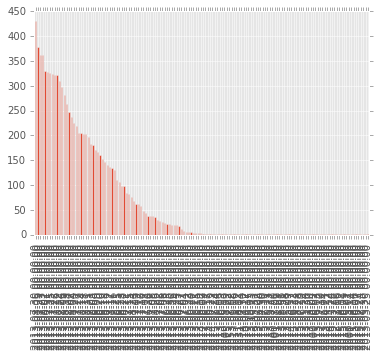

In [47]:
vio_code['Issue Date'].value_counts().plot(kind='bar')

### 15. Make a graph of the amount of revenue collected per day.

In [58]:
money_day = vio_code.groupby(['Issue Date'])[['money']].sum()

In [62]:
money_day.head(10)
#money_day.plot(kind='line', x='Issue Date', y='money', legend=False)

,money
Issue Date,
2000-03-14,65
2000-07-20,65
2000-08-02,45
2001-08-01,115
2009-08-09,60
2010-08-17,60
2011-08-12,60
2011-08-14,60
2012-07-10,95
